<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação 
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguim = sns.load_dataset('penguins')

In [5]:
penguim.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Análise exploratória** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

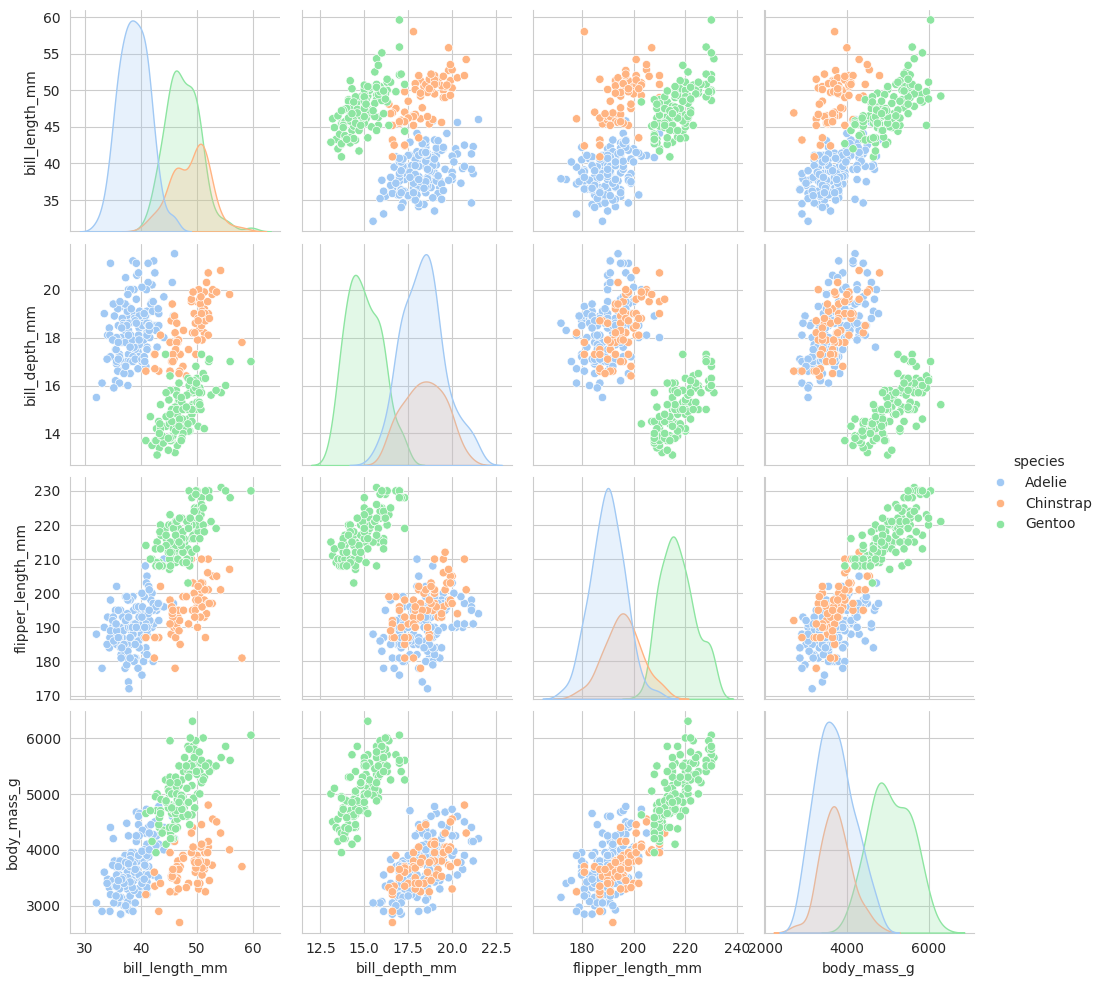

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

### **Comentário**

Analisando os gráficos, observamos que:

1. **Separação da espécie Gentoo**  
   - Utilizando as seguintes combinações de variáveis preditivas:
     - `bico_profundidade` + `bico_comprimento`
     - `bico_profundidade` + `peso_corporal`
     - `bico_comprimento` + `peso_corporal`  
     é possível distinguir facilmente a espécie **Gentoo** das demais.

2. **Separação entre as espécies Adelie e Chinstrap**  
   - Embora apresentem características semelhantes, ao cruzar `bico_comprimento` com:
     - `bico_profundidade`
     - `nadadeira_comprimento`
     - `peso_corporal`  
     conseguimos diferenciar essas duas espécies com uma **assertividade muito próxima de 100%**.

---

 - Sexo por espécie:

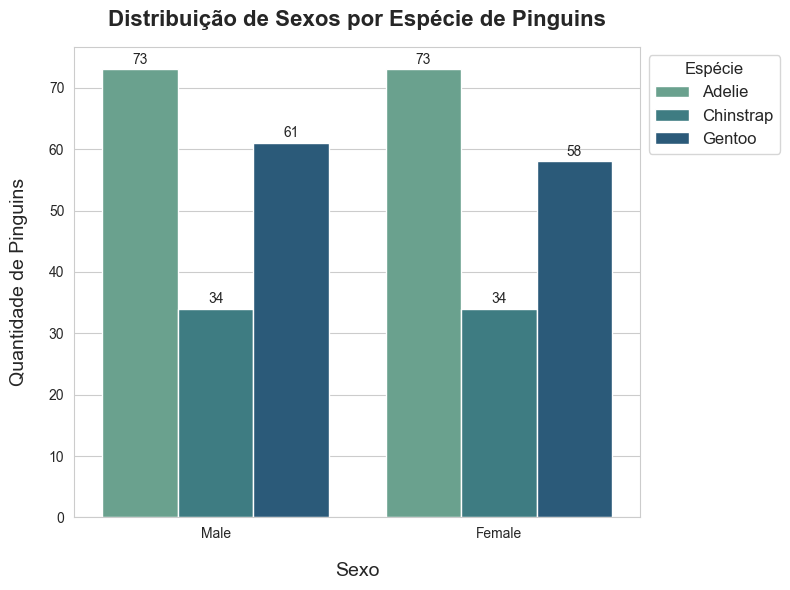

In [38]:
# Definindo o estilo do gráfico
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 6))  # Tamanho do gráfico

    # Criando o gráfico com contagem por sexo e espécies
    grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="crest")

    # Adiciona valores em cima das colunas.
    for p in grafico.containers:
      grafico.bar_label(p, fmt='%.0f', label_type='edge', padding=2)

    # Ajustando título e rótulos
    grafico.set_title('Distribuição de Sexos por Espécie de Pinguins', fontsize=16, fontweight='bold', pad=15)
    grafico.set_xlabel('Sexo', fontsize=14, labelpad=15)
    grafico.set_ylabel('Quantidade de Pinguins', fontsize=14, labelpad=15)

    # Personalizando as legendas e movendo para fora do gráfico
    grafico.legend(title='Espécie', title_fontsize=12, loc='upper left', fontsize=12, 
                  bbox_to_anchor=(1, 1))

    # Exibindo o gráfico
    plt.tight_layout()  # Ajuste automático do layout
    plt.show()


### **Comentário**

Podemos observar o seguinte:

1. **Equilíbrio entre machos e fêmeas:**  
   - Há um equilíbrio geral entre a quantidade de machos e fêmeas nas espécies de pinguins.

2. **Exceção na espécie Gentoo:**  
   - Na espécie **Gentoo**, há **3 machos a mais** em relação às fêmeas.

3. **Diferença nas quantidades por espécie:**  
   - A maior diferença notável está na **quantidade total de pinguins em cada espécie**, indicando variações de populações entre elas.

---


 - Ilha por espécie:

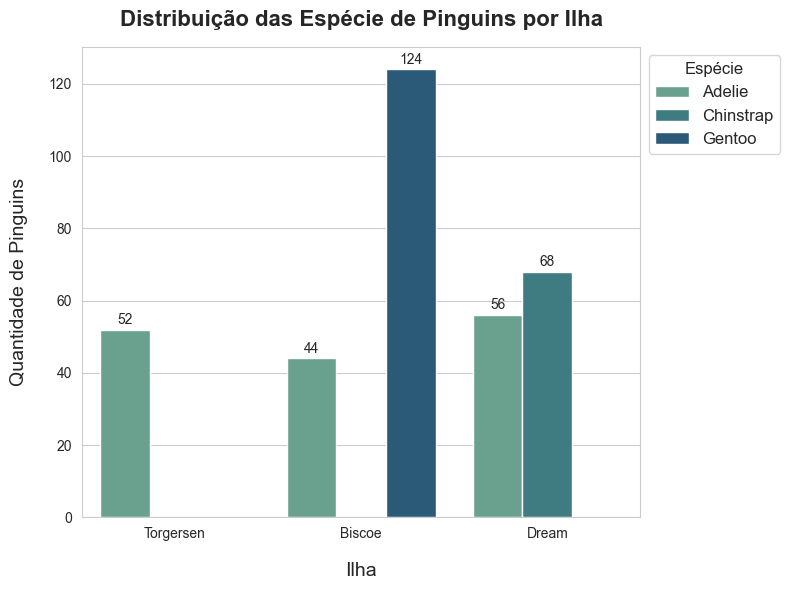

In [35]:
# Definindo o estilo do gráfico
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 6))  # Tamanho do gráfico

    # Criando o gráfico com contagem por sexo e espécies
    grafico = sns.countplot(data=penguim, x='island', hue="species", palette="crest")

    # Adiciona valores em cima das colunas.
    for p in grafico.containers:
      grafico.bar_label(p, fmt='%.0f', label_type='edge', padding=2)

    # Ajustando título e rótulos
    grafico.set_title('Distribuição das Espécie de Pinguins por Ilha', fontsize=16, fontweight='bold', pad=15)
    grafico.set_xlabel('Ilha', fontsize=14, labelpad=15)
    grafico.set_ylabel('Quantidade de Pinguins', fontsize=14, labelpad=15)

    # Personalizando as legendas e movendo para fora do gráfico
    grafico.legend(title='Espécie', title_fontsize=12, loc='upper left', fontsize=12, 
                  bbox_to_anchor=(1, 1))

    # Exibindo o gráfico
    plt.tight_layout()  # Ajuste automático do layout
    plt.show()

### **Comentário**

1. **Distribuição da espécie Adelie:**  
   - A espécie **Adelie** apresenta uma distribuição **quase uniforme** entre as três ilhas.

2. **Concentração da espécie Gentoo:**  
   - Todos os pinguins da espécie **Gentoo** estão concentrados na ilha **Biscoe**.

3. **Concentração da espécie Chinstrap:**  
   - Os pinguins da espécie **Chinstrap** estão exclusivamente na ilha **Dream**.
---

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [48]:
# resposta da questão 2.1

penguim_clear = penguim.dropna()
penguim_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### **2.2. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [49]:
penguim_clear.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [50]:
# resposta da questão 2.2
from sklearn.preprocessing import LabelEncoder

df_island_encoded = pd.get_dummies(penguim_clear['island'], prefix='island_nom')
penguim_clear = pd.concat([penguim_clear, df_island_encoded], axis=1)
penguim_clear.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_nom_Biscoe,island_nom_Dream,island_nom_Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False,False,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False,False,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False,False,True
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,False,False,True


In [51]:
label_encoder_sex = LabelEncoder()
penguim_clear['sex_nom'] = label_encoder_sex.fit_transform(penguim_clear['sex'])
penguim_clear.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_nom_Biscoe,island_nom_Dream,island_nom_Torgersen,sex_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False,False,True,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False,False,True,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False,False,True,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False,False,True,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,False,False,True,1


### **2.3. Limpeza** 

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe. 

In [53]:
# resposta da questão 2.3

penguim_final = penguim_clear.drop(columns=['island', 'sex'])
penguim_final.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_nom_Biscoe,island_nom_Dream,island_nom_Torgersen,sex_nom
0,Adelie,39.1,18.7,181.0,3750.0,False,False,True,1
1,Adelie,39.5,17.4,186.0,3800.0,False,False,True,0
2,Adelie,40.3,18.0,195.0,3250.0,False,False,True,0
4,Adelie,36.7,19.3,193.0,3450.0,False,False,True,0
5,Adelie,39.3,20.6,190.0,3650.0,False,False,True,1


### **2.4. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [57]:
# resposta da questão 2.4
from sklearn.model_selection import train_test_split

penguim_predictors = penguim_final.drop(['species'], axis=1)
penguim_answer = penguim_final['species']


x_train, x_test, y_train, y_test = train_test_split(
    penguim_predictors,
    penguim_answer,
    test_size=0.33,
    random_state=123,
)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** ?

In [90]:
# resposta da questão 3.1
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth=4, random_state=123)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

### **3.2. Avaliação** 

**a.** Matriz de Confusão 

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

### **Comentário**

1. **Modelo Utilizado:**  
   - `DecisionTreeClassifier()`

2. **Análise com profundidade = 3:**  
   - O modelo classificou **5 Chinstrap como Adelie**.  
   - Classificou **1 Gentoo como Chinstrap**.

3. **Análise com profundidade = 4:**  
   - Houve **1 acerto adicional** em relação à profundidade 3.  
   - Erros restantes:  
     - **4 Chinstrap como Adelie**.  
     - **1 Gentoo como Adelie**.

4. **Análise com profundidade = 100:**  
   - **Sem melhorias** em relação aos resultados com profundidade 4.
---

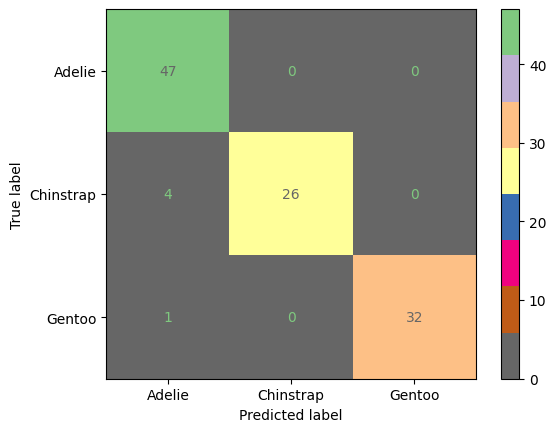

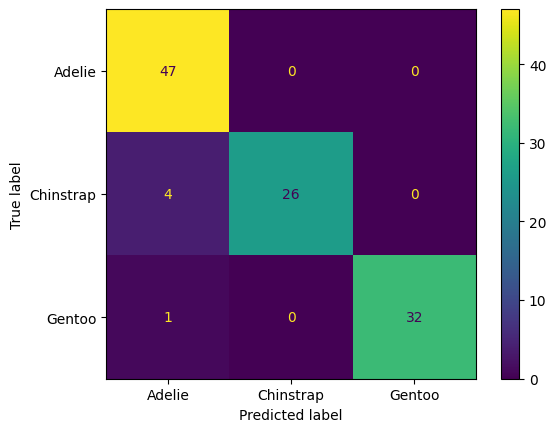

In [91]:
# resposta da questão 3.2.a
from sklearn.metrics import ConfusionMatrixDisplay

# Criar e exibir a matriz de confusão diretamente do modelo
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, cmap='Accent_r')

# Criar e exibir a matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [122]:
# resposta da questão 3.2.b
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

total = cm.sum()

acertos = np.diag(cm).sum()

accu = acertos / total
print(f'Acurácia Numpy: {accu:.0%}')

accuracy =  accuracy_score(y_test, y_pred)
print(f'Acurácia Módulo: {accuracy:.2%}')


Acurácia Numpy: 95%
Acurácia Módulo: 95.45%


## 4\. Predição  

### **4.1. Novo penguim** 

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [106]:
penguim_final.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_nom_Biscoe,island_nom_Dream,island_nom_Torgersen,sex_nom
0,Adelie,39.1,18.7,181.0,3750.0,False,False,True,1
1,Adelie,39.5,17.4,186.0,3800.0,False,False,True,0
2,Adelie,40.3,18.0,195.0,3250.0,False,False,True,0
4,Adelie,36.7,19.3,193.0,3450.0,False,False,True,0
5,Adelie,39.3,20.6,190.0,3650.0,False,False,True,1


In [111]:
# resposta da questão 4.1

penguim_new = np.array([38.2, 18.1, 185.0, 3950.0, True, False, False, 1])

prediction = clf.predict(penguim_new.reshape(1, -1))

print(f'O novo pinguim é da espécie: {list(prediction)[0]}')

O novo pinguim é da espécie: Adelie


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---